<a href="https://colab.research.google.com/github/Lin8823/Lin/blob/main/Heart%20Disease/NN_model/%E5%BF%83%E8%A1%80%E7%AE%A1%E7%96%BE%E7%97%85%E9%A0%90%E6%B8%AC_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, Dense, SimpleRNN, RNN
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/Lin8823/Lin/main/Data/cleveland.csv

--2021-11-03 04:46:15--  https://raw.githubusercontent.com/Lin8823/Lin/main/Data/cleveland.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11102 (11K) [text/plain]
Saving to: ‘cleveland.csv’

cleveland.csv       100%[===================>]  10.84K  --.-KB/s    in 0s      

2021-11-03 04:46:16 (30.1 MB/s) - ‘cleveland.csv’ saved [11102/11102]



In [ ]:
!wget https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv

--2021-11-11 05:05:03--  https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0.001s  

2021-11-11 05:05:03 (15.2 MB/s) - ‘heart.csv’ saved [11328/11328]



In [ ]:
data = pd.read_csv("cleveland.csv",encoding="utf-8")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [ ]:
heart = pd.read_csv("heart.csv", encoding="utf-8")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  num       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
data_z_norm = preprocessing.scale(data) #使用Min-Max Normalization將data標準化至0-1間
data_z_norm = pd.DataFrame(data_z_norm, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
data_z_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,-1.446980,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577,0.043711
293,-1.056185,0.691095,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577,0.043711
294,1.489615,0.691095,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577,0.855089
295,0.272059,0.691095,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577,1.666468


In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #使用Min-Max Normalization將data標準化至0-1間
MinMax_data = MinMaxScaler.fit_transform(data)
data = pd.DataFrame(MinMax_data, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.00
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,0.50
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,0.25
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00,0.25
293,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00,0.25
294,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00,0.50
295,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00,0.75


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.676768,0.719416,0.355600,0.277055,0.144781,0.498316,0.599995,0.326599,0.170251,0.301347,0.225589,0.432660,0.236532
std,0.188536,0.468500,0.321620,0.167574,0.118716,0.352474,0.497457,0.175126,0.469761,0.188084,0.309093,0.312988,0.484657,0.308638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.267123,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.342466,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart = preprocessing.scale(heart)
heart = pd.DataFrame(heart, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #使用Min-Max Normalization將data標準化至0-1間
MinMax_data = MinMaxScaler.fit_transform(heart)
heart = pd.DataFrame(MinMax_data, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
# X = data.values[:,0:8]
# Y = data.values[:,13]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train = X_train.astype(np.float32)
# X_test = X_test.astype(np.float32)
# y_train = y_train.astype(np.float32)
# y_test= y_test.astype(np.float32)
feature = data.drop("num",axis=1)
target = data["num"]
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.20,random_state=0)

In [ ]:
feature_heart = heart.drop("num",axis=1)
target_heart = heart["num"]
# heart_train,heart_test,heart1_train,heart1_test = train_test_split(feature_heart,target_heart,test_size=0.20,random_state=0)

In [ ]:
heart_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,0.291667,0.0,0.666667,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667
153,0.770833,0.0,0.666667,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.5,0.25,0.666667
64,0.604167,1.0,0.666667,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667
296,0.708333,0.0,0.000000,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.5,0.00,0.666667
287,0.583333,1.0,0.333333,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,1.0,0.25,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.291667,1.0,0.000000,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,0.5,1.00,1.000000
192,0.520833,1.0,0.000000,0.245283,0.141553,0.0,0.5,0.320611,0.0,0.225806,0.5,0.25,1.000000
117,0.562500,1.0,1.000000,0.245283,0.152968,0.0,0.0,0.694656,0.0,0.306452,0.5,0.00,1.000000
47,0.375000,1.0,0.666667,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667


##K-Fold

In [ ]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(heart)
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [ ]:
y_test

array([3, 4])

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [ ]:
for train_index, test_index in kf.split(heart):
  print("TRAIN:", train_index, "\nTEST:", test_index)
  heart_train, heart_test = feature_heart.iloc[train_index], feature_heart.iloc[test_index]
  heart1_train, heart1_test = target_heart.iloc[train_index], target_heart.iloc[test_index]

TRAIN: [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302] 
TEST: [ 0

TRAIN: [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302] 
TEST: [ 0

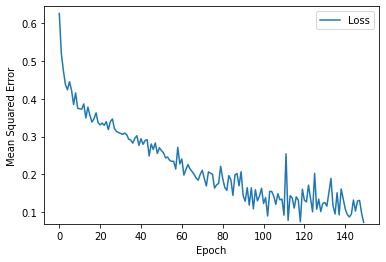

2/2 [==============================] - 0s 7ms/step - loss: 2.3487 - sparse_categorical_accuracy: 0.8033
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 

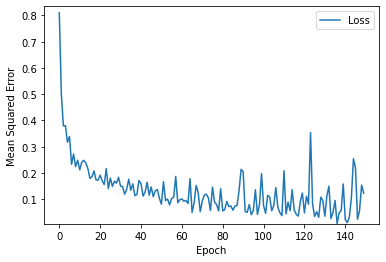

2/2 [==============================] - 0s 3ms/step - loss: 1.7465 - sparse_categorical_accuracy: 0.8689
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 

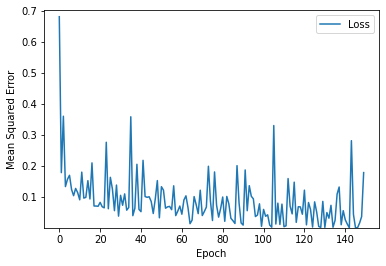

2/2 [==============================] - 0s 6ms/step - loss: 1.4019 - sparse_categorical_accuracy: 0.8852
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 

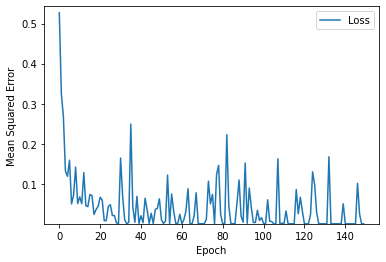

2/2 [==============================] - 0s 10ms/step - loss: 2.9619 - sparse_categorical_accuracy: 0.8500
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218

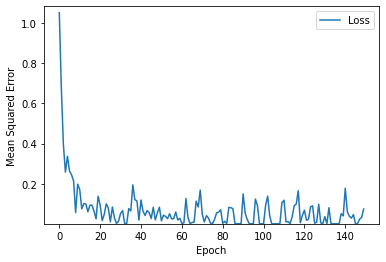

2/2 [==============================] - 0s 8ms/step - loss: 5.4541 - sparse_categorical_accuracy: 0.8000
Test loss: 5.454113960266113
Test accuracy: 0.800000011920929


In [ ]:
test_score_list = []
for train_index, test_index in kf.split(heart):
  print("TRAIN:", train_index, "\nTEST:", test_index)
  heart_train, heart_test = feature_heart.iloc[train_index], feature_heart.iloc[test_index]
  heart1_train, heart1_test = target_heart.iloc[train_index], target_heart.iloc[test_index]
  model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=["sparse_categorical_accuracy"]
)

  history = model3.fit(heart_train, heart1_train, batch_size=8, epochs=150)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model3.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

In [ ]:
test_score_list

[0.8032786846160889,
 0.868852436542511,
 0.8852459192276001,
 0.8500000238418579,
 0.800000011920929]

In [ ]:
test_score_list

[0.868852436542511,
 0.8032786846160889,
 0.9180327653884888,
 0.9166666865348816,
 0.9833333492279053]

In [ ]:
model3.save("NN_model")

INFO:tensorflow:Assets written to: NN_model/assets


In [ ]:
model = keras.models.load_model("NN_model")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
vec_a = [1, 2, 3, 4, 5] #使用者資料
vec_b = [] #原始資料
for i in range(len(heart)):
  vec_b=[heart.iloc[i][0],heart.iloc[i][2], heart.iloc[i][4], heart.iloc[i][6], heart.iloc[i][8]]

In [ ]:
x_train.shape

(237, 13)

In [ ]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


#**Neural Network**

In [ ]:
inputs = keras.Input(shape=(13))
dense = layers.Dense(7, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
x = layers.Dense(5, activation="relu")(dense)
x = layers.Dense(3, activation="relu")(x)
outputs = layers.Dense(2,activation="relu")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
model.summary()

Model: "NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, batch_size=10, epochs=30)

test_scores = model.evaluate(x_test, y_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 19.7124 - accuracy: 0.5485
Epoch 2/30
24/24 [==============================] - 0s 1ms/step - loss: 14.5236 - accuracy: 0.5485
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 10.2691 - accuracy: 0.5485
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 7.1636 - accuracy: 0.5485
Epoch 5/30
24/24 [==============================] - 0s 1ms/step - loss: 4.9462 - accuracy: 0.5485
Epoch 6/30
24/24 [==============================] - 0s 1ms/step - loss: 3.0327 - accuracy: 0.5485
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 1.7368 - accuracy: 0.5485
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.9217 - accuracy: 0.5485
Epoch 9/30
24/24 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.5485
Epoch 10/30
24/24 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.5485
Epoch 11/30
24/2

#**Neural Network2** 

In [ ]:
keras.backend.clear_session()

In [ ]:
inputs = keras.Input(shape=(13))
dense = layers.Dense(10, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
x = layers.Dense(8, activation="relu")(dense)
x = layers.Dense(6, activation="relu")(x)
x = layers.Dense(4, activation="relu")(x)
outputs = layers.Dense(2,activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="NN2")
model.summary()

Model: "NN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0015),
    metrics=["accuracy"]
)

history = model.fit(heart_train, heart1_train, batch_size=15, epochs=200)
epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["loss"]
plot_the_loss_curve(epochs, mse)

test_scores = model.evaluate(heart_test, heart1_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

In [ ]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.03),
    metrics=["accuracy"]
)

history = model.fit(heart_train, heart1_train, batch_size=10, epochs=30)

test_scores = model.evaluate(heart_test, heart1_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
25/25 [==============================] - 1s 1ms/step - loss: 0.4139 - accuracy: 0.5289
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.5702
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.5826
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.5413
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.5992
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.6488
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.6488
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.6488
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.6529
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.7149
Epoch 11/30
25/25 [

In [ ]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.03),
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, batch_size=4, epochs=30)

test_scores = model.evaluate(x_test, y_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
60/60 [==============================] - 1s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 2/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 3/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 4/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 5/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 6/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 7/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 8/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 9/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 10/30
60/60 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5485
Epoch 11/30
60/60 [

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.03),
    metrics=["accuracy"]
)

history = model.fit(heart_train, heart1_train, batch_size=10, epochs=30)

test_scores = model.evalmuate(heart_test, heart1_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
25/25 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.8264
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.8430
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.8595
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.8636
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8843
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.8843
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.8595
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.8388
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.8554
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8678
Epoch 11/30
25/25 [

#**Neural Network3**

In [ ]:
inputs = keras.Input(shape=(13))
dense = layers.Dense(12, activation="relu")(inputs)
x = layers.Dense(8, activation="relu")(dense)
x = layers.Dense(6, activation="relu")(x)
x = layers.Dense(4, activation="relu")(x)
outputs = layers.Dense(2,activation="relu")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs, name="NN3")
model3.summary()

Model: "NN3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 364
Trainable params: 364
Non-trainable params: 0

In [ ]:
keras.backend.clear_session()

Epoch 1/150
31/31 [==============================] - 1s 2ms/step - loss: 0.4269 - sparse_categorical_accuracy: 0.8595
Epoch 2/150
31/31 [==============================] - 0s 2ms/step - loss: 0.2617 - sparse_categorical_accuracy: 0.9050
Epoch 3/150
31/31 [==============================] - 0s 1ms/step - loss: 0.2698 - sparse_categorical_accuracy: 0.8967
Epoch 4/150
31/31 [==============================] - 0s 1ms/step - loss: 0.2610 - sparse_categorical_accuracy: 0.9050
Epoch 5/150
31/31 [==============================] - 0s 2ms/step - loss: 0.2386 - sparse_categorical_accuracy: 0.9132
Epoch 6/150
31/31 [==============================] - 0s 2ms/step - loss: 0.3149 - sparse_categorical_accuracy: 0.8967
Epoch 7/150
31/31 [==============================] - 0s 1ms/step - loss: 0.2455 - sparse_categorical_accuracy: 0.9174
Epoch 8/150
31/31 [==============================] - 0s 2ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.8884
Epoch 9/150
31/31 [==============================] - 0s 

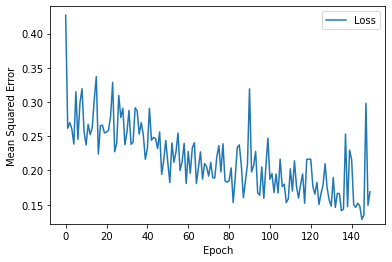

2/2 [==============================] - 0s 7ms/step - loss: 1.9006 - sparse_categorical_accuracy: 0.7377
Test loss: 1.900630235671997
Test accuracy: 0.7377049326896667


In [ ]:
model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=["sparse_categorical_accuracy"]
)

history = model3.fit(heart_train, heart1_train, batch_size=8, epochs=150)

epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["loss"]
plot_the_loss_curve(epochs, mse)

test_scores = model3.evaluate(heart_test, heart1_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/150
31/31 [==============================] - 1s 2ms/step - loss: 0.6619 - sparse_categorical_accuracy: 0.6033
Epoch 2/150
31/31 [==============================] - 0s 2ms/step - loss: 0.5534 - sparse_categorical_accuracy: 0.8058
Epoch 3/150
31/31 [==============================] - 0s 1ms/step - loss: 0.5003 - sparse_categorical_accuracy: 0.8099
Epoch 4/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4750 - sparse_categorical_accuracy: 0.8140
Epoch 5/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4582 - sparse_categorical_accuracy: 0.8058
Epoch 6/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4554 - sparse_categorical_accuracy: 0.8223
Epoch 7/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4415 - sparse_categorical_accuracy: 0.8182
Epoch 8/150
31/31 [==============================] - 0s 1ms/step - loss: 0.4430 - sparse_categorical_accuracy: 0.8099
Epoch 9/150
31/31 [==============================] - 0s 

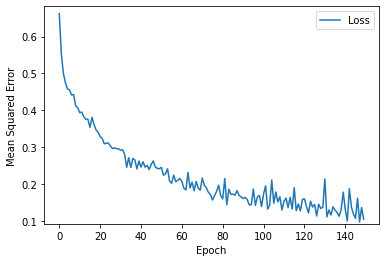

2/2 [==============================] - 0s 7ms/step - loss: 2.0370 - sparse_categorical_accuracy: 0.8525
Test loss: 2.0370378494262695
Test accuracy: 0.8524590134620667


In [ ]:
model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=["sparse_categorical_accuracy"]
)

history = model3.fit(heart_train, heart1_train, batch_size=8, epochs=150)

epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["loss"]
plot_the_loss_curve(epochs, mse)

test_scores = model3.evaluate(heart_test, heart1_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

# **Functional API**

In [ ]:
inputs = keras.Input(shape=(13))
inputs

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'input_1')>

In [ ]:
RNN1 = SimpleRNN(units=128, activation='relu', return_sequences=False, return_state=False)
embedded = layers.Embedding(input_dim=1000, output_dim=64)(inputs)

RNN1_output = RNN1(embedded)
dense = layers.Dense(64, activation="relu")
x = dense(RNN1_output)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(5,activation="relu")(x)
x = layers.Dense(5,activation="relu")(x)
# outputs = layers.Dropout(.4)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="RNN")
model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 13, 64)            64000     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 128)               24704     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55      

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=10, epochs=30)

test_scores = model.evaluate(x_test, y_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

#**Sequential API**

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(256))
model.add(Dense(100,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=300)
model.summary()

Epoch 1/300
8/8 [==============================] - 1s 14ms/step - loss: 1.9172 - accuracy: 0.1013
Epoch 2/300
8/8 [==============================] - 0s 15ms/step - loss: 1.3873 - accuracy: 0.0802
Epoch 3/300
8/8 [==============================] - 0s 16ms/step - loss: 1.2797 - accuracy: 0.0633
Epoch 4/300
8/8 [==============================] - 0s 16ms/step - loss: 1.0822 - accuracy: 0.0633
Epoch 5/300
8/8 [==============================] - 0s 15ms/step - loss: 0.9857 - accuracy: 0.1181
Epoch 6/300
8/8 [==============================] - 0s 17ms/step - loss: 0.8931 - accuracy: 0.0970
Epoch 7/300
8/8 [==============================] - 0s 15ms/step - loss: 0.8335 - accuracy: 0.0591
Epoch 8/300
8/8 [==============================] - 0s 16ms/step - loss: 0.7937 - accuracy: 0.0127
Epoch 9/300
8/8 [==============================] - 0s 16ms/step - loss: 0.7576 - accuracy: 0.0928
Epoch 10/300
8/8 [==============================] - 0s 16ms/step - loss: 0.6172 - accuracy: 0.1308
Epoch 11/300
8/8 [=

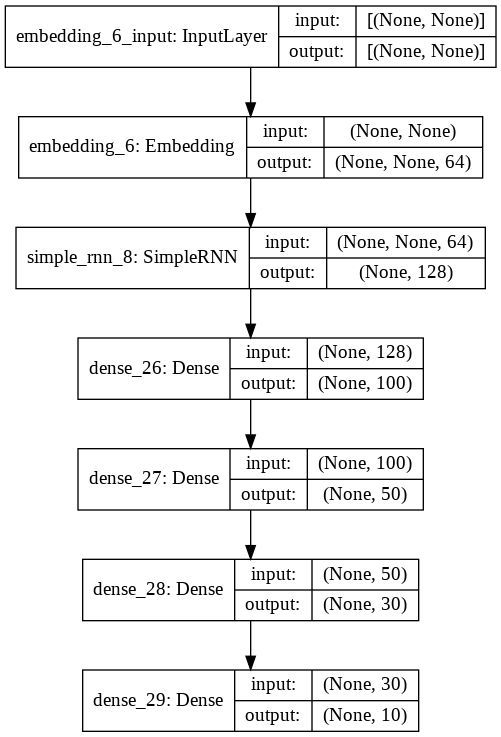

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru_1 (GRU)                  (None, None, 256)         247296    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 128)               49280     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


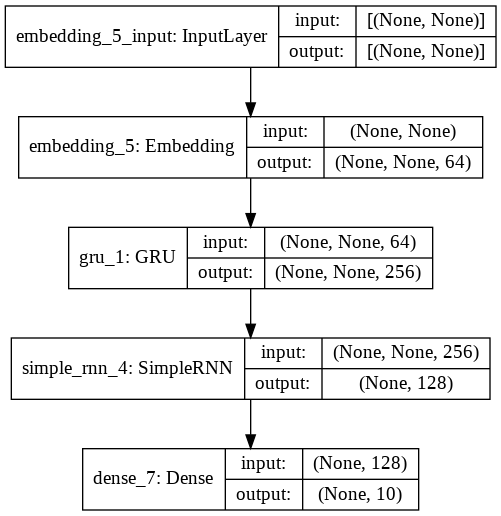

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

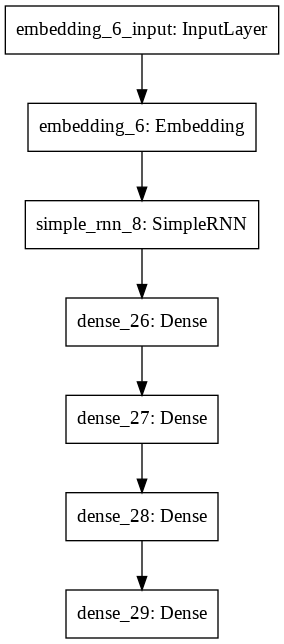

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
model = Sequential()
model.add(layers.SimpleRNN(4, return_sequences=True, return_state=True))
model.add(layers.Dense(20, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
# model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=250, batch_size=6)

In [ ]:
inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.

simple_rnn = tf.keras.layers.SimpleRNN(
    4, return_sequences=True, return_state=True)

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)

In [ ]:
inputs[0]

array([[0.24971445, 0.9776413 , 0.05168002, 0.5699385 , 0.589462  ,
        0.03905299, 0.3127105 , 0.8881442 ],
       [0.84033483, 0.09171414, 0.25320238, 0.59824353, 0.96359605,
        0.17636225, 0.4463245 , 0.36075726],
       [0.6510612 , 0.5888933 , 0.7538376 , 0.3970714 , 0.8613639 ,
        0.3826321 , 0.04896752, 0.54268616],
       [0.40932405, 0.56731045, 0.39017928, 0.00321266, 0.24048747,
        0.45997867, 0.1514041 , 0.40426993],
       [0.5332657 , 0.82043356, 0.82826716, 0.3763688 , 0.7658367 ,
        0.5388162 , 0.30548093, 0.02758659],
       [0.7689481 , 0.35342434, 0.4039667 , 0.8621815 , 0.19310169,
        0.54396087, 0.2245848 , 0.41770956],
       [0.18485667, 0.03549163, 0.26754263, 0.9724708 , 0.4563086 ,
        0.68534046, 0.34452182, 0.6366018 ],
       [0.4466682 , 0.19625534, 0.7469571 , 0.14575097, 0.0407002 ,
        0.57535684, 0.87748146, 0.04498002],
       [0.58965164, 0.56765   , 0.6484523 , 0.89145374, 0.5645696 ,
        0.9909422 , 0.304948